<a href="https://colab.research.google.com/github/joaomarciel2/metricas_avaliacao/blob/main/M%C3%A9tricas_Avalia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Métricas de Avaliação em Machine Learning**

Em projetos de *Machine Learning*, é necessário avaliar corretamente o desempenho de um modelo do que somente construí-lo.

Elas são responsáveis por indicar o quão bem o modelo está conseguindo aprender e generalizar os padrões presentes nos dados.

A escolha da métrica certa depende diretamente do problema em questão, por isso, é fundamental compreender as principais métricas e o que cada uma representa.

### Matriz de Confusão

A matriz de confusão é uma tabela que resume os resultados das previsões feitas por um modelo. Ela compara os valores reais com os valores previstos e ajuda a identificar acertos e erros do modelo.
São compostos por:

*   **VP (Verdadeiro Positivo)**: O modelo previu positivo e estava certo;

*   **VN (Verdadeiro Negativo)**: O modelo previu negativo e estava certo;

*   **FP (Falso Positivo)**: O modelo previu positivo, mas estava errado;

*   **FN (Falso Negativo)**: O modelo previu negativo, mas estava errado.



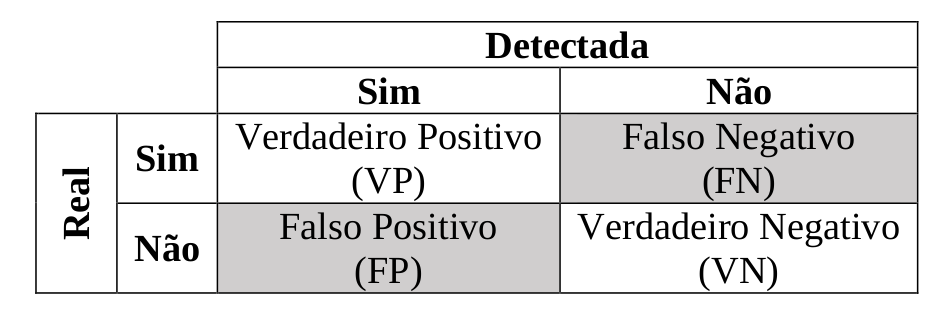

### **Acurácia**

A acurácia mede a proporção de previsões previstas corretas (positivas e negativas) em relação ao total de previsões feitas.

É útil quando as classes estão balanceadas, mas pode ser enganosa quando há desequilíbrio entre as classes

É representada pela seguinte fórmula:

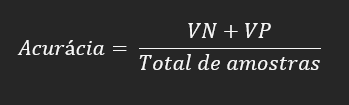

### **Precisão (Precision)**

A precisão indica a proporção de previsões positivas que estavam realmente corretas.

Ela é importante quando os falsos positivos têm alto custo.

É representada pela seguinte fórmula:

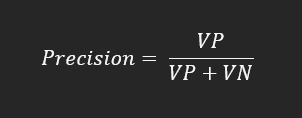

### **Sensibilidade (Recall)**

A sensibilidade (ou recall), mede a capacidade do modelo de encontrar todos os exemplos positivos.

É essencial em situações onde falsos negativos são críticos.

É representada pela seguinte fórmula:

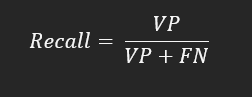

### **Especificidade**

A especificidade mede a capacidade do modelo de identificar corretamente os exemplos negativos.

Ela é útil para avaliar se o modelo consegue não confundir os negativos com positivos.

É representada pela seguinte fórmula:

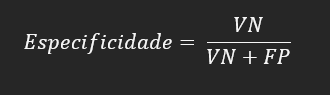

### **F1-Score**

O F1-Score é a média harmônica entre precisão e recall, oferecendo um equilíbrio entre essas duas métricas.

É ideal quando se busca um bom equilíbrio entre os falsos positivos e os falsos negativos, especialmente em cenários com classes desbalanceadas.

É representado pela seguinte fórmula:

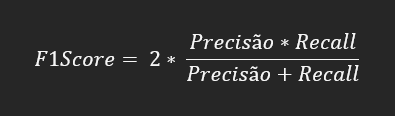

### **Código - Métricas de Avaliação**

<H2> Instalação e Carregamento do Dataset <b>MNIST</b> </h2>

In [ ]:
# Instalação das bibliotecas

from tensorflow.keras import datasets, layers, models
from tensorflow import math, argmax
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Carregamento do dataset MNIST (imagens de dígitos manuscritos)
%load_ext tensorboard
logdir = 'log'

# Dataset separado em treino e teste
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<h2> Redimensionando as imagens </h2>

In [ ]:
# Redimensionando as imagens

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0
classes = [0,1,2,3,4,5,6,7,8,9]

<h2> Treinamento do Modelo em 5 Épocas</h2>

In [ ]:
# Treinamento do modelo

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 1ª camada convolucional, com 32 filtros, tamanho do kernel 3x3, função de ativação ReLU
model.add(layers.MaxPool2D((2, 2))) # 1ª camada de pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # 2ª camada convolucional com 64 filtros
model.add(layers.MaxPool2D((2, 2))) # 2ª camada de pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # 3ª camada convolucional

model.add(layers.Flatten()) # Transforma o volume 3D em um vetor 1D para alimentar as camadas densas
model.add(layers.Dense(64, activation='relu')) # Camada densa com 64 neurônios e ativação ReLU
model.add(layers.Dense(10, activation='softmax')) # Camada de saída com 10 neurônios e ativação softmax

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Função de perda: entropia cruzada para rótulos inteiros
              metrics=['accuracy']) # Métrica: acurácia

# Treinamento do modelo por 5 épocas
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.8978 - loss: 0.3287 - val_accuracy: 0.9844 - val_loss: 0.0480
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9851 - loss: 0.0476 - val_accuracy: 0.9840 - val_loss: 0.0513
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 29ms/step - accuracy: 0.9897 - loss: 0.0325 - val_accuracy: 0.9888 - val_loss: 0.0331
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9922 - loss: 0.0267 - val_accuracy: 0.9911 - val_loss: 0.0307
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9931 - loss: 0.0208 - val_accuracy: 0.9914 - val_loss: 0.0298


In [ ]:
y_true = test_labels
y_pred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


<h2> Montando uma Matriz de Confusão </h2>

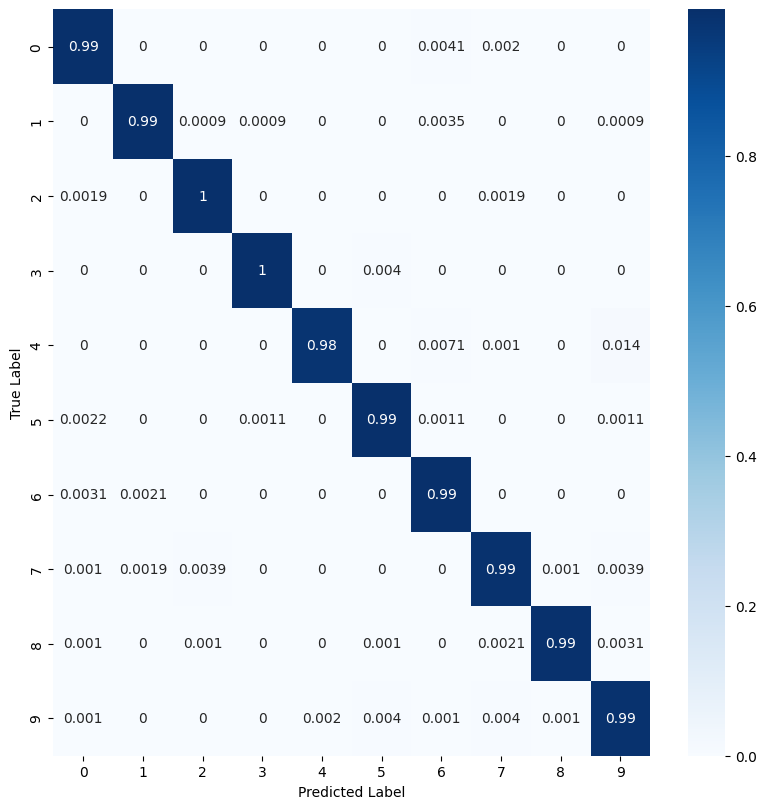

In [ ]:
# Montando uma matriz de confusão

predicted_labels = argmax(y_pred, axis=1)
con_mat = math.confusion_matrix(labels= y_true, predictions=predicted_labels).numpy() # Criação da matriz de confusão entre os rótulos reais (y_true) e os previstos (predicted_labels)
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=4) # Normalização da matriz para representar proporções

con_mat_df = pd.DataFrame(con_mat_norm,
                          index= classes,
                          columns= classes)

# Plotagem do heatmap da matriz de confusão
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

<h2> Resultado das Métricas </h2>

In [ ]:
# Resultado das métricas
VP_T = 0
FP_T = 0
FN_T = 0
VN_T = 0

# Loop para calcular métricas de avaliação (por classe) com base na matriz de confusão normalizada
for number_class in con_mat_df.index:
    VP = con_mat_df.loc[number_class, number_class]
    FP = con_mat_df.loc[:, number_class].sum() - VP
    FN = con_mat_df.loc[number_class, :].sum() - VP
    VN = con_mat_df.values.sum() - (VP + FP + FN)

    VP_T += VP
    FP_T += FP
    FN_T += FN
    VN_T += VN
    acuracia = (VP + VN) / (VP + VN + FP + FN)
    recall = VP / (VP + FN)
    precisao = VP / (VP + FP)
    especificidade = VN / (VN + FP)
    f1_score = 2 * (precisao * recall) / (precisao + recall)
    print(f"Classe {number_class}:")
    print(f"Verdadeiro Positivo: {VP:.7f}")
    print(f"Falso Positivo: {FP:.7f}")
    print(f"Falso Negativo: {FN:.7f}")
    print(f"Verdadeiro Negativo: {VN:.7f}\n")


    print(f"Acurácia: {acuracia:.7f}")
    print(f"Precisão: {precisao:.7f}")
    print(f"Sensibilidade: {recall:.7f}")
    print(f"Especificidade: {especificidade:.7f}")
    print(f"F1-Score: {f1_score:.7f}\n")
    print("-------------------------------------")

# ----------------------------------------------------- #
# Cálculo total das métricas
acuracia_total = (VP_T + VN_T) / (VP_T + VN_T + FP_T + FN_T)
recall_total = VP_T / (VP_T + FN_T)
precisao_total = VP_T / (VP_T + FP_T)
especificidade_total = VN_T / (VN_T + FP_T)
f1_score_total = 2 * (precisao_total * recall_total) / (precisao_total + recall_total)

print(f'Total:')
print(f'Verdadeiro Positivo: {VP_T:.7f}')
print(f'Falso Positivo: {FP_T:.7f}')
print(f'Falso Negativo: {FN_T:.7f}')
print(f'Verdadeiro Negativo: {VN_T:.7f}\n')

print(f'Acurácia: {acuracia_total:.7f}')
print(f'Precisão: {precisao_total:.7f}')
print(f'Sensibilidade: {recall_total:.7f}')
print(f'Especificidade: {especificidade_total:.7f}')
print(f'F1-Score: {f1_score_total:.7f}')
print('---------------------------------------------')

Classe 0:
Verdadeiro Positivo: 0.9939000
Falso Positivo: 0.0102000
Falso Negativo: 0.0061000
Verdadeiro Negativo: 8.9897000

Acurácia: 0.9983700
Precisão: 0.9898416
Sensibilidade: 0.9939000
Especificidade: 0.9988667
F1-Score: 0.9918667

-------------------------------------
Classe 1:
Verdadeiro Positivo: 0.9938000
Falso Positivo: 0.0040000
Falso Negativo: 0.0062000
Verdadeiro Negativo: 8.9959000

Acurácia: 0.9989800
Precisão: 0.9959912
Sensibilidade: 0.9938000
Especificidade: 0.9995556
F1-Score: 0.9948944

-------------------------------------
Classe 2:
Verdadeiro Positivo: 0.9961000
Falso Positivo: 0.0058000
Falso Negativo: 0.0038000
Verdadeiro Negativo: 8.9942000

Acurácia: 0.9990400
Precisão: 0.9942110
Sensibilidade: 0.9961996
Especificidade: 0.9993556
F1-Score: 0.9952043

-------------------------------------
Classe 3:
Verdadeiro Positivo: 0.9960000
Falso Positivo: 0.0020000
Falso Negativo: 0.0040000
Verdadeiro Negativo: 8.9979000

Acurácia: 0.9994000
Precisão: 0.9979960
Sensibilid